In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')


from SALib.sample import saltelli
from SALib.analyze import sobol

import scipy 
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('/Users/casper/Documents/TU Della/Thesis/Finals Docs/Experiments/tables/Final model experiment 4 table-table.csv', skiprows=6 ) 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000100 entries, 0 to 10000099
Data columns (total 49 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   [run number]                                    int64  
 1   walking-radius                                  int64  
 2   prob-of-violating-rules                         int64  
 3   new-car-treshold                                float64
 4   number-of-cars-company0                         int64  
 5   graduated-sanctions                             bool   
 6   car-sharing-demand                              int64  
 7   number-of-companies                             int64  
 8   collective-choice-arrangement                   bool   
 9   One-company                                     bool   
 10  number-of-cars-company1                         int64  
 11  sanctioning-multiple                            int64  
 12  speed                     

In [4]:
df.rename(columns={'[run number]':'run number','[step]':'tick', '[ satisfied-users ] of company 0':'satisfied company 0',  '[ satisfied-users ] of company 1':'satisfied company 1', '[ satisfied-users ] of company 2': 'satisfied company 2', '[ unsatisfied-users ] of company 0':'unsatisfied company 0',  '[ unsatisfied-users ] of company 1':'unsatisfied company 1', '[ unsatisfied-users ] of company 2': 'unsatisfied company 2', 'count cars with [ ( company-id = company 0 ) ]': 'cars company 0', 'count cars with [ ( company-id = company 1 ) ]': 'cars company 1', 'count cars with [ ( company-id = company 2 ) ]': 'cars company 2'  }, inplace= True) 
df ['total satisfied users'] = df['satisfied company 0'] + df['satisfied company 1'] + df['satisfied company 2'] 
df ['total unsatisfied users'] = df['unsatisfied company 0'] + df['unsatisfied company 1'] + df['unsatisfied company 2'] 
df ['total no parking found'] = df['[ no-parking ] of company 0'] + df['[ no-parking ] of company 1'] + df['[ no-parking ] of company 2']
df ['total profit'] = df[ '[ profit ] of company 0'] + df[ '[ profit ] of company 1'] + df[ '[ profit ] of company 2'] 
df.rename(columns={ '[ no-parking ] of company 0': 'no parking company 0', '[ no-parking ] of company 1': 'no parking company 1', '[ no-parking ] of company 2': 'no parking company 2', '[ company-price ] of company 0': 'price company 0', '[ company-price ] of company 1': 'price company 1', '[ company-price ] of company 2': 'price company 2', '[ profit ] of company 0': 'profit company 0', '[ profit ] of company 1': 'profit company 1', '[ profit ] of company 2': 'profit company 2'}, inplace= True)

In [5]:
df1 = df.drop(columns=['walking-radius', 'prob-of-violating-rules', 'new-car-treshold', 'number-of-cars-company0', 'number-of-cars-company1', 'number-of-cars-company2', 'number-of-companies', 'One-company', 'speed', '[ vote ] of company 0', '[ vote ] of company 1', '[ vote ] of company 2', 'prob-of-sanctioning', '[ company-rules-violated ] of company 0', '[ company-rules-violated ] of company 1', '[ company-rules-violated ] of company 2', '[ company-sanctioned ] of company 0', '[ company-sanctioned ] of company 1', '[ company-sanctioned ] of company 2', 'car-sharing-demand'])

In [6]:
df4 = df1.drop(columns=['run number', 'tick', 'satisfied company 0', 'satisfied company 1', 'satisfied company 2', 'unsatisfied company 0', 'unsatisfied company 1', 'unsatisfied company 2', 'price company 0', 'price company 1', 'price company 2', 'profit company 0', 'profit company 1', 'profit company 2', 'cars company 0', 'cars company 1', 'cars company 2'])

In [7]:
list(df1.columns)

['run number',
 'graduated-sanctions',
 'collective-choice-arrangement',
 'sanctioning-multiple',
 'starting-bottom-price',
 'tick',
 'satisfied company 0',
 'unsatisfied company 0',
 'satisfied company 1',
 'unsatisfied company 1',
 'satisfied company 2',
 'unsatisfied company 2',
 'price company 0',
 'price company 1',
 'price company 2',
 'profit company 0',
 'profit company 1',
 'profit company 2',
 'cars company 0',
 'cars company 1',
 'cars company 2',
 'count users',
 'market-price',
 'bottom-price',
 'count cars with [ available = true ]',
 'count patches with [ empty = true ]',
 'no parking company 0',
 'no parking company 1',
 'no parking company 2',
 'total satisfied users',
 'total unsatisfied users',
 'total no parking found',
 'total profit']

In [7]:
spearman1 = df4.corr(method='spearman')
spearman1

,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,count users,market-price,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
graduated-sanctions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collective-choice-arrangement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sanctioning-multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
starting-bottom-price,NaN,NaN,NaN,1.000000,0.010170,0.191563,0.182159,0.012707,-0.013232,0.000929,0.001794,-0.000800,0.000644,-0.000055,0.000645,0.149511
count users,NaN,NaN,NaN,0.010170,1.000000,0.025876,0.077840,-0.418175,0.421578,0.058970,0.058993,0.058884,0.058945,0.058799,0.058944,0.061065
market-price,NaN,NaN,NaN,0.191563,0.025876,1.000000,0.662117,-0.376324,0.377172,0.504512,0.504913,0.505918,0.505202,0.506162,0.505222,0.629777
bottom-price,NaN,NaN,NaN,0.182159,0.077840,0.662117,1.000000,-0.820574,0.820623,0.923659,0.924283,0.924247,0.924240,0.924644,0.924251,0.979218
count cars with [ available = true ],NaN,NaN,NaN,0.012707,-0.418175,-0.376324,-0.820574,1.000000,-0.999180,-0.903630,-0.903964,-0.903314,-0.903831,-0.903716,-0.903827,-0.843954
count patches with [ empty = true ],NaN,NaN,NaN,-0.013232,0.421578,0.377172,0.820623,-0.999180,1.000000,0.903017,0.903316,0.902714,0.903211,0.903098,0.903206,0.843860
no parking company 0,NaN,NaN,NaN,0.000929,0.058970,0.504512,0.923659,-0.903630,0.903017,1.000000,0.999320,0.999331,0.999775,0.999739,0.999775,0.957901


In [7]:
df1.head(5)

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,1,True,True,20,5,0,0,0,0,0,...,5.000,600,489,0,0,0,0,0,0,0.0
1,4,True,True,20,5,0,0,0,0,0,...,5.000,600,489,0,0,0,0,0,0,0.0
2,3,True,True,20,5,0,0,0,0,0,...,5.000,600,489,0,0,0,0,0,0,0.0
3,2,True,True,20,5,0,0,0,0,0,...,5.000,600,489,0,0,0,0,0,0,0.0
4,4,True,True,20,5,1,0,0,0,0,...,4.997,599,490,0,0,0,0,0,0,0.0


In [7]:
spearman = df1.corr(method='spearman')
spearman

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
run number,1.000000e+00,NaN,NaN,NaN,8.660687e-01,1.235785e-16,0.000114,-0.000272,0.002330,0.001580,...,0.164641,0.016245,-0.016531,0.000127,0.002363,-0.000992,0.000507,-0.000033,0.000514,0.133772
graduated-sanctions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collective-choice-arrangement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sanctioning-multiple,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
starting-bottom-price,8.660687e-01,NaN,NaN,NaN,1.000000e+00,-3.717285e-16,0.000916,0.000345,0.001759,0.000842,...,0.182159,0.012707,-0.013232,0.000929,0.001794,-0.000800,0.000644,-0.000055,0.000645,0.149511
tick,1.235785e-16,NaN,NaN,NaN,-3.717285e-16,1.000000e+00,0.999739,0.999741,0.999729,0.999727,...,0.924976,-0.903834,0.903234,0.999739,0.999729,0.999742,0.999962,0.999966,0.999962,0.958776
satisfied company 0,1.136793e-04,NaN,NaN,NaN,9.155475e-04,9.997392e-01,1.000000,0.999545,0.999320,0.999484,...,0.923646,-0.903631,0.903018,1.000000,0.999320,0.999331,0.999775,0.999740,0.999775,0.957896
unsatisfied company 0,-2.721822e-04,NaN,NaN,NaN,3.450559e-04,9.997410e-01,0.999545,1.000000,0.999503,0.999295,...,0.924053,-0.903420,0.902814,0.999545,0.999503,0.999514,0.999745,0.999765,0.999745,0.958157
satisfied company 1,2.330017e-03,NaN,NaN,NaN,1.759083e-03,9.997294e-01,0.999320,0.999503,1.000000,0.999533,...,0.924270,-0.903970,0.903321,0.999320,1.000000,0.999325,0.999773,0.999743,0.999773,0.958073
unsatisfied company 1,1.579786e-03,NaN,NaN,NaN,8.415091e-04,9.997267e-01,0.999484,0.999295,0.999533,1.000000,...,0.924671,-0.903829,0.903174,0.999484,0.999533,0.999499,0.999730,0.999766,0.999730,0.958280


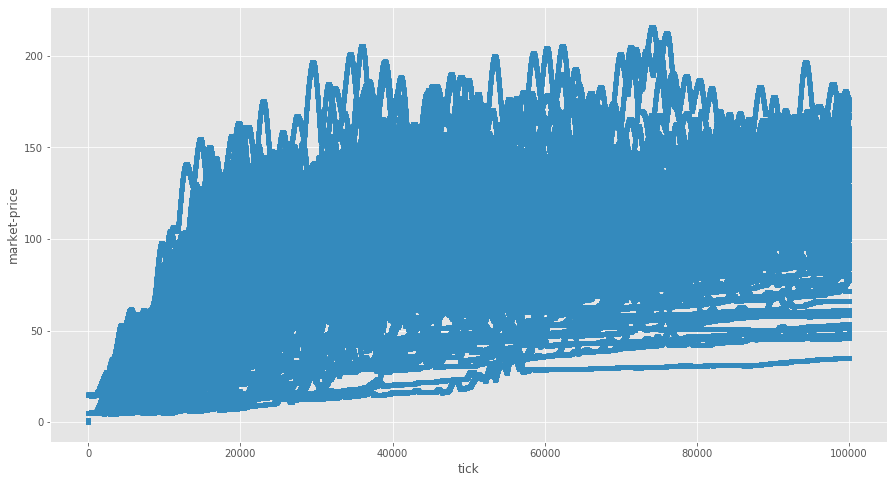

In [8]:
df1.plot.scatter(x='tick',y='market-price',figsize=(15,8))

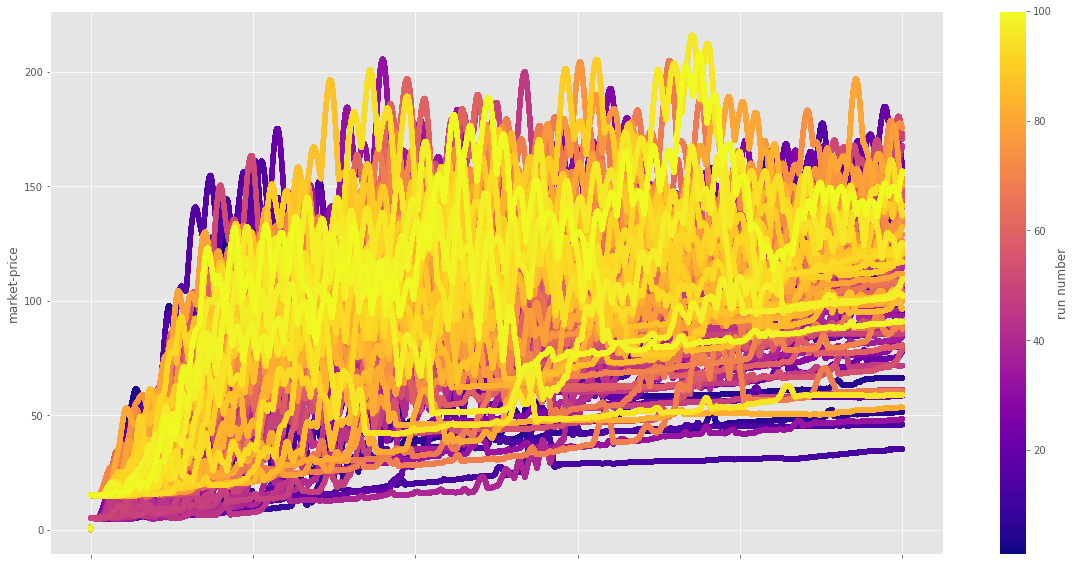

In [9]:
df1.plot.scatter(x='tick',y='market-price',c='run number',colormap='plasma',figsize=(20,10))

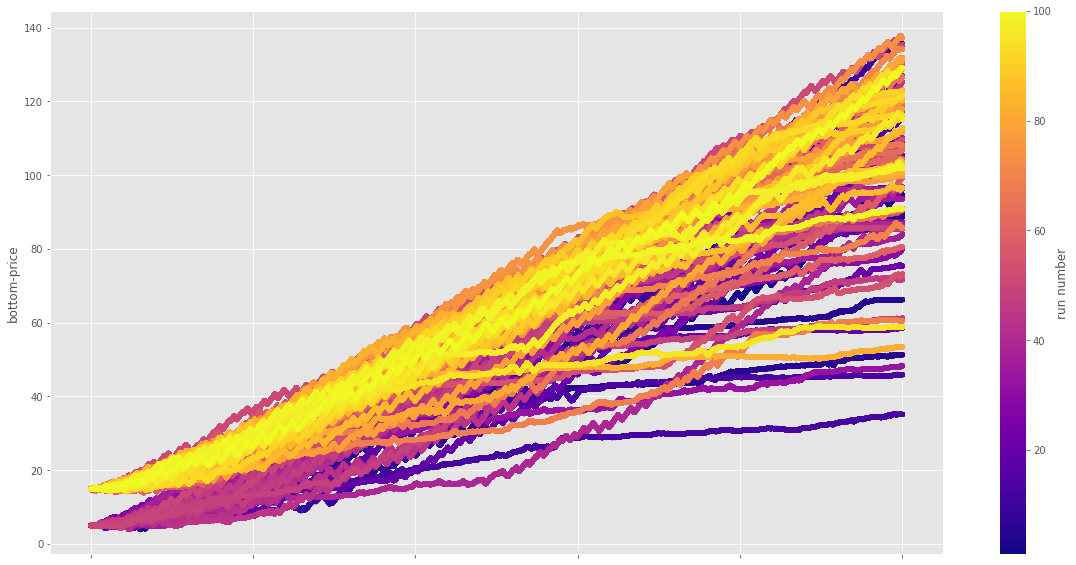

In [10]:
df1.plot.scatter(x='tick',y='bottom-price',c='run number',colormap='plasma',figsize=(20,10))

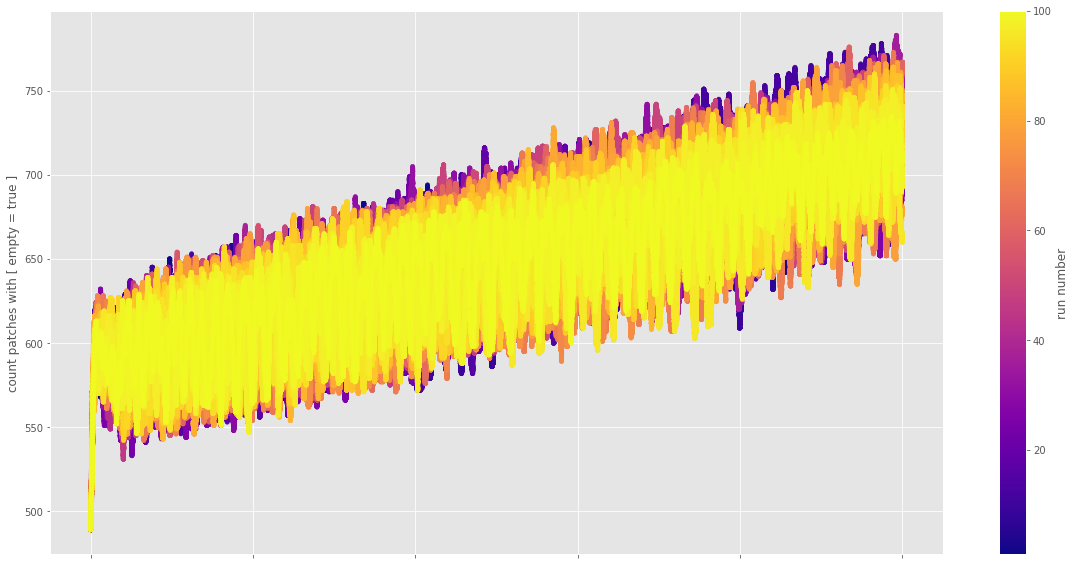

In [11]:
df1.plot.scatter(x='tick',y='count patches with [ empty = true ]',c='run number',colormap='plasma',figsize=(20,10))

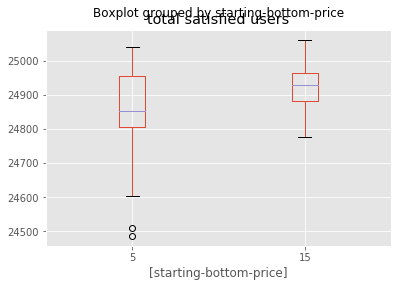

In [12]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total satisfied users'], by=['starting-bottom-price'])
 
plt.show()

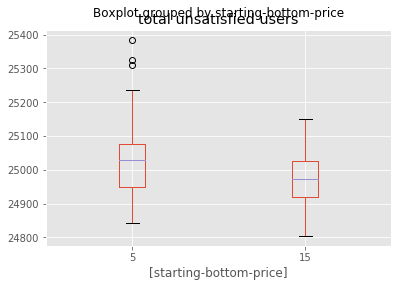

In [13]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total unsatisfied users'], by=['starting-bottom-price'])

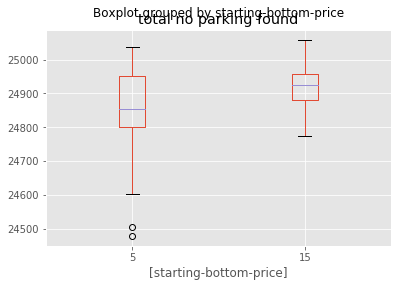

In [14]:
df1.loc[df1['tick'] == 100000].boxplot(column=['total no parking found'], by=['starting-bottom-price'])

Text(0, 0.5, 'Combined company profits')

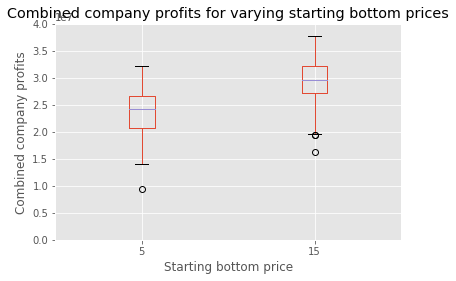

In [9]:
plot = df1.loc[df1['tick'] == 100000].boxplot(column=['total profit'], by=['starting-bottom-price'])
plt.ylim(0, 40000000 )
plot.get_figure().gca().set_title("Combined company profits for varying starting bottom prices")
plot.get_figure().suptitle('')
plot.get_figure().gca().set_xlabel("Starting bottom price")
plot.get_figure().gca().set_ylabel("Combined company profits")

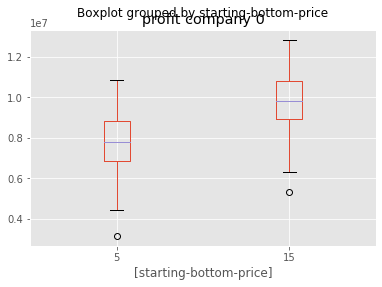

In [16]:
df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 0'], by=['starting-bottom-price'])

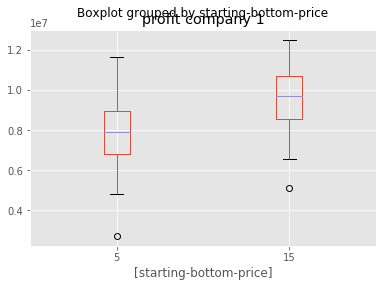

In [17]:
df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 1'], by=['starting-bottom-price'])

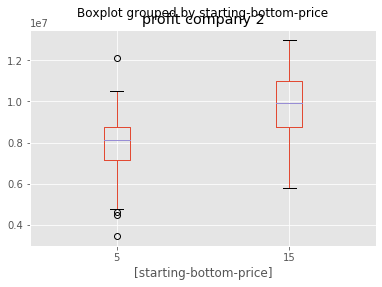

In [18]:
df1.loc[df1['tick'] == 100000].boxplot(column=['profit company 2'], by=['starting-bottom-price'])

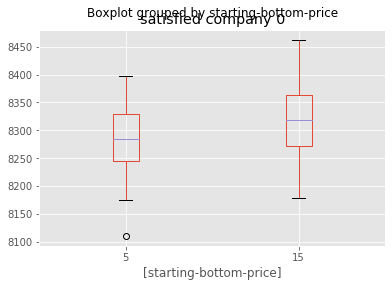

In [19]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 0'], by=['starting-bottom-price'])

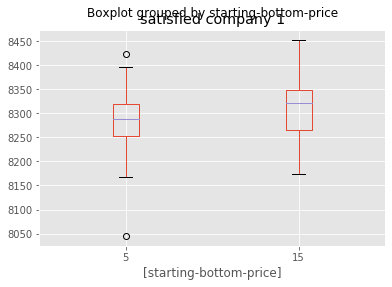

In [20]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 1'], by=['starting-bottom-price'])

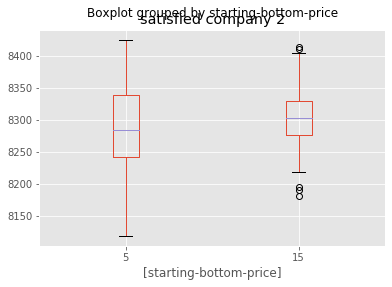

In [21]:
df1.loc[df1['tick'] == 100000].boxplot(column=['satisfied company 2'], by=['starting-bottom-price'])

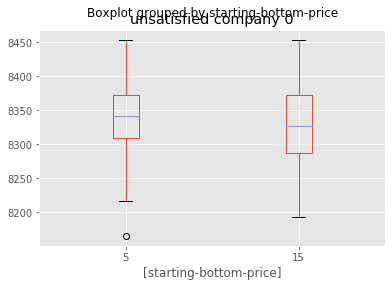

In [22]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 0'], by=['starting-bottom-price'])

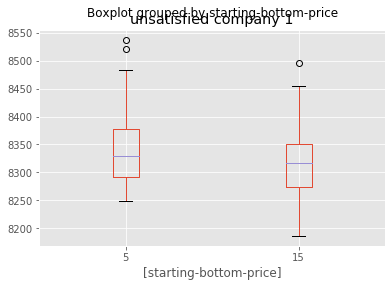

In [23]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 1'], by=['starting-bottom-price'])

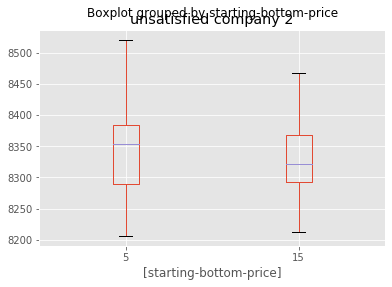

In [24]:
df1.loc[df1['tick'] == 100000].boxplot(column=['unsatisfied company 2'], by=['starting-bottom-price'])

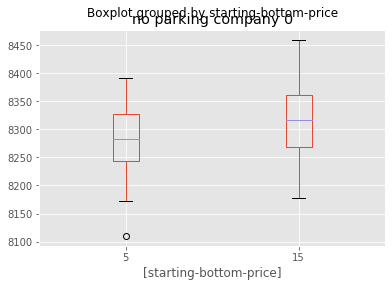

In [25]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 0'], by=['starting-bottom-price'])

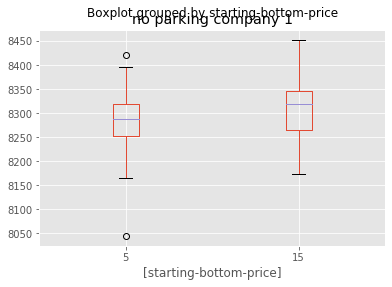

In [26]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 1'], by=['starting-bottom-price'])

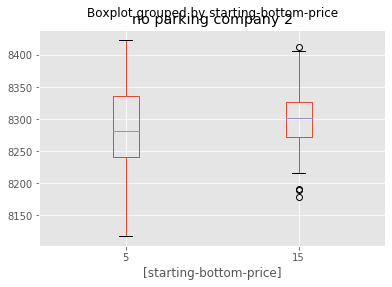

In [27]:
df1.loc[df1['tick'] == 100000].boxplot(column=['no parking company 2'], by=['starting-bottom-price'])

In [7]:
df2 = df1.loc[df1['starting-bottom-price'] == 5 ]
df2.head(5)

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
0,1,True,True,20,5,0,0,0,0,0,...,5.000,600,489,0,0,0,0,0,0,0.0
1,4,True,True,20,5,0,0,0,0,0,...,5.000,600,489,0,0,0,0,0,0,0.0
2,3,True,True,20,5,0,0,0,0,0,...,5.000,600,489,0,0,0,0,0,0,0.0
3,2,True,True,20,5,0,0,0,0,0,...,5.000,600,489,0,0,0,0,0,0,0.0
4,4,True,True,20,5,1,0,0,0,0,...,4.997,599,490,0,0,0,0,0,0,0.0


In [8]:
df3 = df1.loc[df1['starting-bottom-price'] == 15 ]
df3.head(5)

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
4758760,51,True,True,20,15,0,0,0,0,0,...,15.000,600,489,0,0,0,0,0,0,0.0
4758764,51,True,True,20,15,1,0,0,0,0,...,14.997,599,490,0,0,0,0,0,0,0.0
4758768,51,True,True,20,15,2,0,0,0,1,...,14.998,599,490,0,0,0,0,1,0,0.0
4758772,51,True,True,20,15,3,0,0,0,1,...,14.999,598,491,0,0,0,0,1,0,0.0
4758776,51,True,True,20,15,4,0,0,0,2,...,14.998,598,491,0,0,0,0,2,0,0.0


In [30]:
df3.agg([np.mean, np.std])

,run number,graduated-sanctions,collective-choice-arrangement,sanctioning-multiple,starting-bottom-price,tick,satisfied company 0,unsatisfied company 0,satisfied company 1,unsatisfied company 1,...,bottom-price,count cars with [ available = true ],count patches with [ empty = true ],no parking company 0,no parking company 1,no parking company 2,total satisfied users,total unsatisfied users,total no parking found,total profit
mean,75.500000,1.0,1.0,20.0,15.0,50000.00000,4142.566306,4162.013108,4144.639039,4163.752121,...,59.772541,431.365643,654.293755,4142.227843,4144.450145,4135.283730,12422.992379,12481.299777,12421.961718,1.177848e+07
std,14.430871,0.0,0.0,0.0,0.0,28867.80502,2406.691695,2408.582156,2405.258097,2407.223874,...,31.080623,44.768500,44.386881,2406.399196,2405.073913,2402.965886,7213.578673,7219.384385,7212.661915,8.941757e+06


<ErrorbarContainer object of 3 artists>

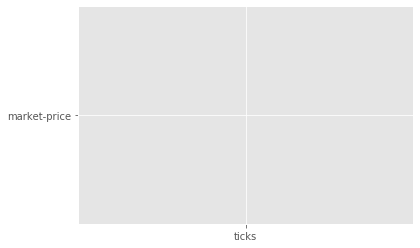

In [31]:
plt.errorbar(x = 'ticks', y = 'market-price')

In [9]:
df3_mean = df3['market-price'].mean()
print(df3_mean)
df3_std = df3['market-price'].std()
print(df3_std)

91.61596839913935
40.67216341494509


In [33]:
df3_mean2 = df3['count patches with [ empty = true ]'].mean()
print(df3_mean2)
df3_std2 = df3['count patches with [ empty = true ]'].std()
print(df3_std2)

654.2937552624473
44.386881495205586


In [34]:
df3_mean1 = df3['bottom-price'].mean()
print(df3_mean1)
df3_std1 = df3['bottom-price'].std()
print(df3_std1)

59.77254063821935
31.080623281080143


In [10]:
df2_mean = df2['market-price'].mean()
print(df2_mean)
df2_std = df2['market-price'].std()
print(df2_std)

76.54714120819392
39.0021167100861


In [36]:
df2_mean1 = df2['bottom-price'].mean()
print(df2_mean1)
df2_std1 = df2['bottom-price'].std()
print(df2_std1)

48.2301687671223
30.311171381274736


In [37]:
df2_mean2 = df2['count patches with [ empty = true ]'].mean()
print(df2_mean2)
df2_std2 = df2['count patches with [ empty = true ]'].std()
print(df2_std2)

655.4343388566115
44.559778366228684


In [12]:
df3['market-price'].max()

215.97233333335492

In [ ]:
pearsoncorr = df1.corr(method='spearman')
pearsoncorr